# Simple Linear Regression (Manual Calculation VS Scikit-Learn Lib)


In this notebook, we will learn **Simple Linear Regression** in two ways:  

1. **From Scratch** – implementing formulas step by step.  
2. **With Scikit-learn** – using Python’s machine learning library.  

Our dataset relates **House Area (sq ft)** and **Price**.


In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dataset
data = {
    "Area": [1000, 1500, 2000, 2500, 3000],
    "Price": [250, 400, 450, 500, 550]
}
df = pd.DataFrame(data)
df


,Area,Price
0,1000,250
1,1500,400
2,2000,450
3,2500,500
4,3000,550


## 2. Simple Linear Regression from Scratch

### Step 1 — Compute Means


We want to fit the equation:  

$$ \hat{y} = \beta_0 + \beta_1 x $$


In [8]:

X = df["Area"].values
y = df["Price"].values

x_mean = np.mean(X)
y_mean = np.mean(y)

x_mean, y_mean


(2000.0, 430.0)


### Step 2: Compute slope (β₁) and intercept (β₀)

$$ \beta_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2} $$
$$ \beta_0 = \bar{y} - \beta_1 \bar{x} $$


In [11]:

num = np.sum((X - x_mean) * (y - y_mean))
den = np.sum((X - x_mean) ** 2)

beta1 = num / den
beta0 = y_mean - beta1 * x_mean

beta0, beta1


(150.0, 0.14)

In [13]:

y_pred = beta0 + beta1 * X
df["ŷ (Predicted Price)"] = y_pred
df["Residuals"] = y - y_pred
df


,Area,Price,ŷ (Predicted Price),Residuals
0,1000,250,290.0,-4.000000e+01
1,1500,400,360.0,4.000000e+01
2,2000,450,430.0,2.000000e+01
3,2500,500,500.0,-5.684342e-14
4,3000,550,570.0,-2.000000e+01



### Step 4: Error metrics

$$ RSS = \sum (y_i - \hat{y}_i)^2 $$  
$$ MSE = \frac{RSS}{n}, \quad RMSE = \sqrt{MSE} $$  
$$ R^2 = 1 - \frac{RSS}{TSS}, \quad TSS = \sum (y_i - \bar{y})^2 $$


In [16]:

RSS = np.sum(df["Residuals"]**2)
MSE = RSS / len(df)
RMSE = np.sqrt(MSE)
TSS = np.sum((y - y_mean) ** 2)
R2 = 1 - (RSS / TSS)

print(f" From Scratch Metrics:")
print(f" RSS  (Residual Sum of Squares):      {RSS:.2f}")
print(f" MSE  (Mean Squared Error):           {MSE:.2f}")
print(f" RMSE (Root Mean Squared Error):      {RMSE:.2f}")
print(f" R²   (Coefficient of Determination): {R2:.4f}")


 From Scratch Metrics:
 RSS  (Residual Sum of Squares):      4000.00
 MSE  (Mean Squared Error):           800.00
 RMSE (Root Mean Squared Error):      28.28
 R²   (Coefficient of Determination): 0.9245


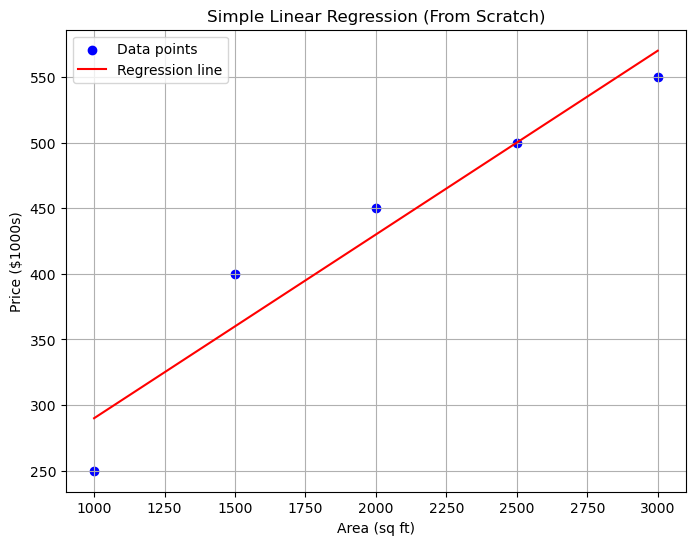

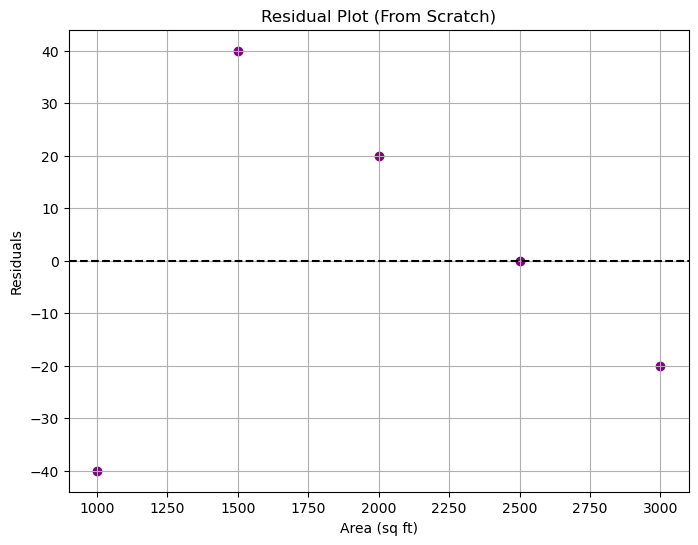

In [18]:

plt.figure(figsize=(8,6))
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred, color="red", label="Regression line")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price ($1000s)")
plt.title("Simple Linear Regression (From Scratch)")
plt.legend()
plt.grid(True)
plt.show()

# Residual plot
plt.figure(figsize=(8,6))
plt.scatter(X, df["Residuals"], color="purple")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Area (sq ft)")
plt.ylabel("Residuals")
plt.title("Residual Plot (From Scratch)")
plt.grid(True)
plt.show()


##  3. Linear Regression with Scikit-learn

In [21]:

X_reshaped = df[["Area"]]  # 2D input for sklearn
y = df["Price"]

model = LinearRegression()
model.fit(X_reshaped, y)

beta0_sklearn = model.intercept_
beta1_sklearn = model.coef_[0]

y_pred_sklearn = model.predict(X_reshaped)
df["ŷ (sklearn)"] = y_pred_sklearn
df["Residuals (sklearn)"] = y - y_pred_sklearn
df


,Area,Price,ŷ (Predicted Price),Residuals,ŷ (sklearn),Residuals (sklearn)
0,1000,250,290.0,-4.000000e+01,290.0,-4.000000e+01
1,1500,400,360.0,4.000000e+01,360.0,4.000000e+01
2,2000,450,430.0,2.000000e+01,430.0,2.000000e+01
3,2500,500,500.0,-5.684342e-14,500.0,-5.684342e-14
4,3000,550,570.0,-2.000000e+01,570.0,-2.000000e+01


In [23]:

RSS_sklearn = np.sum(df["Residuals (sklearn)"]**2)
MSE_sklearn = mean_squared_error(y, y_pred_sklearn)
RMSE_sklearn = np.sqrt(MSE_sklearn)
R2_sklearn = r2_score(y, y_pred_sklearn)

print(f" Scikit-learn Metrics:")
print(f" RSS  (Residual Sum of Squares):      {RSS_sklearn:.2f}")
print(f" MSE  (Mean Squared Error):           {MSE_sklearn:.2f}")
print(f" RMSE (Root Mean Squared Error):      {RMSE_sklearn:.2f}")
print(f" R²   (Coefficient of Determination): {R2_sklearn:.4f}")


 Scikit-learn Metrics:
 RSS  (Residual Sum of Squares):      4000.00
 MSE  (Mean Squared Error):           800.00
 RMSE (Root Mean Squared Error):      28.28
 R²   (Coefficient of Determination): 0.9245


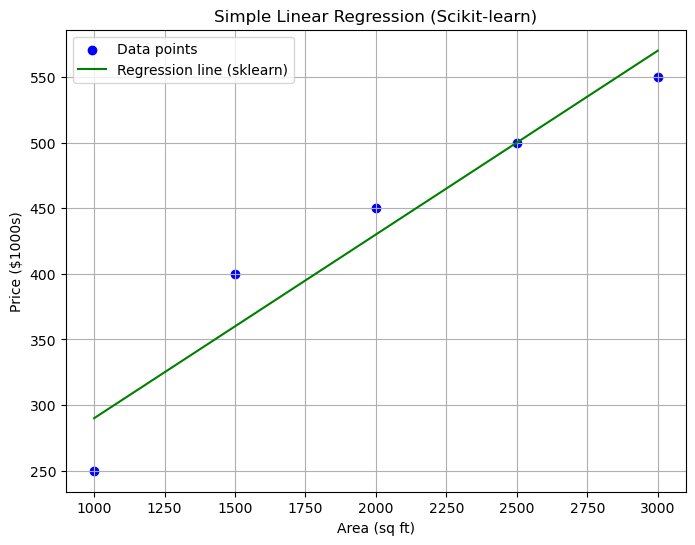

In [25]:

plt.figure(figsize=(8,6))
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred_sklearn, color="green", label="Regression line (sklearn)")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price ($1000s)")
plt.title("Simple Linear Regression (Scikit-learn)")
plt.legend()
plt.grid(True)
plt.show()


##  4. Comparison Table

In [28]:

comparison = pd.DataFrame({
    "Metric": ["β₀ (Intercept)", "β₁ (Slope)", "RSS", "MSE", "RMSE", "R²"],
    "From Scratch": [beta0, beta1, RSS, MSE, RMSE, R2],
    "Scikit-learn": [beta0_sklearn, beta1_sklearn, RSS_sklearn, MSE_sklearn, RMSE_sklearn, R2_sklearn]
})

comparison


,Metric,From Scratch,Scikit-learn
0,β₀ (Intercept),150.000000,150.000000
1,β₁ (Slope),0.140000,0.140000
2,RSS,4000.000000,4000.000000
3,MSE,800.000000,800.000000
4,RMSE,28.284271,28.284271
5,R²,0.924528,0.924528



##  5. Conclusion

- The **scratch method** shows the math behind regression.  
- **Scikit-learn** makes it quick & efficient for real-world use.  
- Both approaches give **identical results**.  
